In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support

In [6]:
data = pd.read_csv(r'/supermarket_sales - Sheet1.csv')
df = pd.DataFrame(data.iloc[:10, :17])
numeric_cols = df.select_dtypes(include=[np.number])
grouped_data = df.groupby('Rating')
rating_means = {}
rating_std = {}

In [9]:
for rating, group in grouped_data:
  rating_means[rating] = group[numeric_cols.columns].mean(axis=0)
  rating_std[rating] = group[numeric_cols.columns].std(axis=0)

In [10]:
ratings = list(rating_means.keys())
num_ratings = len(ratings)
mean_distances = np.zeros((num_ratings, num_ratings))

In [11]:
for i in range(num_ratings):
    for j in range(i + 1, num_ratings):
        rating1 = ratings[i]
        rating2 = ratings[j]
        mean_distances[i, j] = np.linalg.norm(rating_means[rating1] - rating_means[rating2])
        mean_distances[j, i] = mean_distances[i, j]

In [12]:
for rating, mean in rating_means.items():
    print(f"Rating: {rating}, Mean Vector:", mean)

for rating, std in rating_std.items():
    print(f"Rating: {rating}, Standard Deviation:", std)

Rating: 4.1, Mean Vector: Unit price                  85.390000
Quantity                     7.000000
Tax 5%                      29.886500
Total                      627.616500
cogs                       597.730000
gross margin percentage      4.761905
gross income                29.886500
Rating                       4.100000
dtype: float64
Rating: 5.3, Mean Vector: Unit price                  86.310000
Quantity                     7.000000
Tax 5%                      30.208500
Total                      634.378500
cogs                       604.170000
gross margin percentage      4.761905
gross income                30.208500
Rating                       5.300000
dtype: float64
Rating: 5.8, Mean Vector: Unit price                  68.840000
Quantity                     6.000000
Tax 5%                      20.652000
Total                      433.692000
cogs                       413.040000
gross margin percentage      4.761905
gross income                20.652000
Rating            

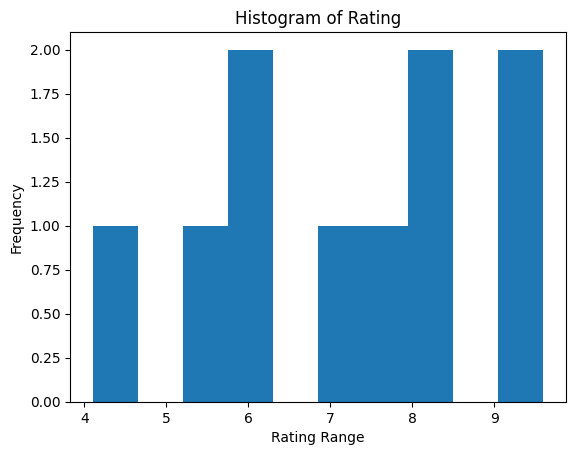

In [13]:
plt.hist(df['Rating'], bins=10)
plt.title('Histogram of Rating')
plt.xlabel('Rating Range')
plt.ylabel('Frequency')
plt.show()

In [14]:
mean_rating = df['Rating'].mean()
variance_rating = df['Rating'].var()

print(f"Mean Rating: {mean_rating}")
print(f"Variance Rating: {variance_rating}")


Mean Rating: 7.080000000000001
Variance Rating: 3.1351111111111107


In [15]:
rating_values = df['Rating']
quantity_values = df['Quantity']
minkowski_distances = []

In [16]:
for r in range(1, 11):
    distances = np.abs(rating_values - quantity_values) ** r
    minkowski_distance = np.sum(distances) ** (1/r)
    minkowski_distances.append(minkowski_distance)

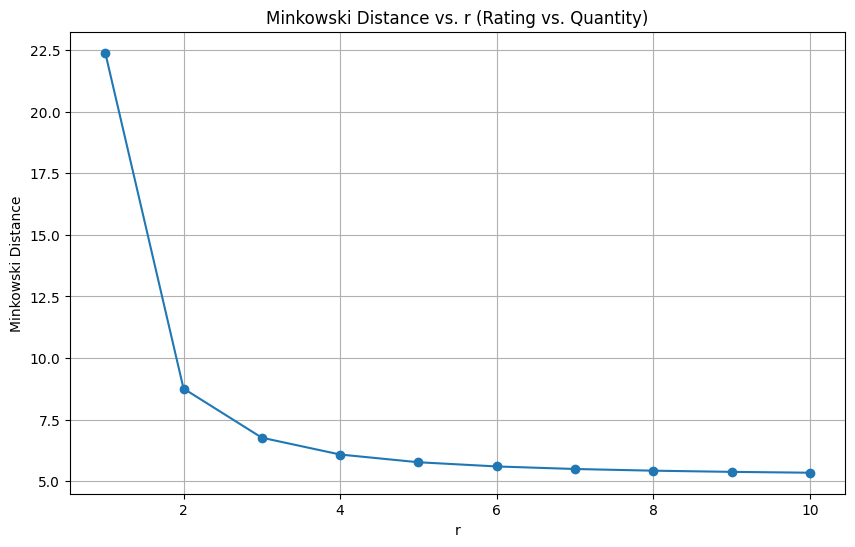

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), minkowski_distances, marker='o', linestyle='-')
plt.title('Minkowski Distance vs. r (Rating vs. Quantity)')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.grid(True)
plt.show()

In [18]:
data['Rating'] = pd.cut(data['Rating'], bins=[0, 2, 4, 6, 8, 10], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
X = data[['Quantity', 'gross income']]
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
accuracy = knn_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)
y_pred = knn_classifier.predict(X_test)
print("Actual Labels:", y_test.head().tolist())
print("Predicted Labels:", y_pred[:5].tolist())

Accuracy: 0.325
Actual Labels: ['High', 'Very High', 'Very High', 'Very High', 'High']
Predicted Labels: ['High', 'Very High', 'Very High', 'High', 'Very High']


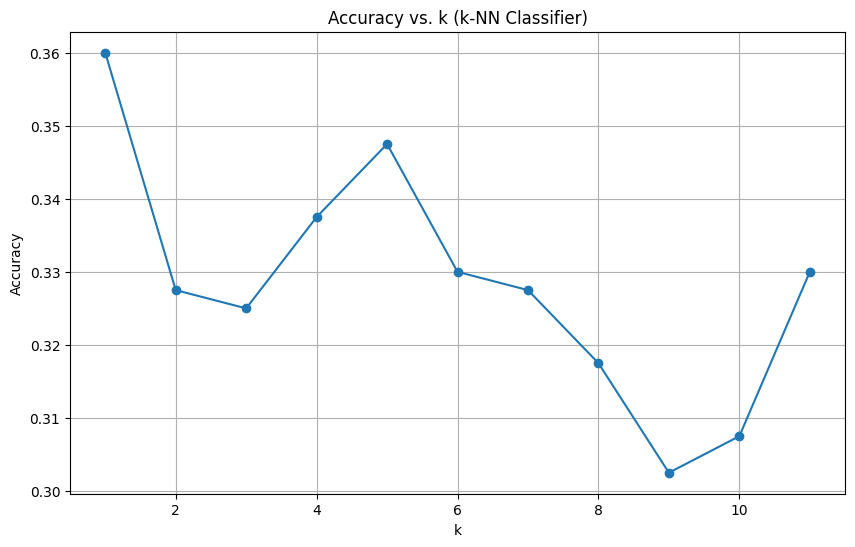

In [19]:
k_values = list(range(1, 12))
accuracy_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. k (k-NN Classifier)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [20]:
y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix (Training Data):")
print(confusion_matrix_train)
print("\nConfusion Matrix (Test Data):")
print(confusion_matrix_test)


Confusion Matrix (Training Data):
[[137   0  39  38]
 [  4   0   4   0]
 [ 83   0  74  34]
 [ 78   0  45  64]]

Confusion Matrix (Test Data):
[[65  0 40 32]
 [ 2  0  1  0]
 [67  0 42 30]
 [67  0 29 25]]


In [24]:
precision_train, recall_train, f1_score_train, _ = precision_recall_fscore_support(y_train, y_train_pred, average='weighted')
precision_test, recall_test, f1_score_test, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print("\nPrecision (Training Data):", precision_train)
print("Recall (Training Data):", recall_train)
print("F1-Score (Training Data):", f1_score_train)


Precision (Training Data): 0.45387730629820394
Recall (Training Data): 0.4583333333333333
F1-Score (Training Data): 0.4463670703098965


In [23]:
print("\nPrecision (Test Data):", precision_test)
print("Recall (Test Data):", recall_test)
print("F1-Score (Test Data):", f1_score_test)


Precision (Test Data): 0.32799649382398355
Recall (Test Data): 0.33
F1-Score (Test Data): 0.32074193610174684
